In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error 
from sklearn.ensemble import RandomForestClassifier

In [2]:
#read the data
df = pd.read_csv ('CleanData.csv')
print(df.shape)
#data splitting
df_traindata = df.iloc[:18000,:]
print(df_traindata.shape)
df_testdata = df.iloc[18000:,:]
print(df_testdata.shape)
df

(24783, 2)
(18000, 2)
(6783, 2)


,isHateSpeech,tweet
0,0,RT mayasolovely As a woman you shouldn t comp...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...
3,1,RT C G Anderson viva based she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...
...,...,...
24778,1,you s a muthaf in lie LifeAsKing Pearls corey ...
24779,1,you ve gone and broke the wrong heart baby and...
24780,1,young buck wanna eat dat nigguh like I aint fu...
24781,1,youu got wild bitches tellin you lies


In [3]:
#clean the data

In [4]:
#pre-process the data
tokenizer=Tokenizer(num_words=None,oov_token="<oov>")
tokenizer.fit_on_texts(df_traindata['tweet'])

In [5]:
word_index_train=tokenizer.word_index
print(word_index_train)

{'<oov>': 1, 'i': 2, 'a': 3, 'bitch': 4, 'the': 5, 't': 6, 'you': 7, 'rt': 8, 'to': 9, 'that': 10, 'and': 11, 'my': 12, 'in': 13, 'bitches': 14, 'is': 15, 'it': 16, 'co': 17, 'like': 18, 'http': 19, 'me': 20, 's': 21, 'of': 22, 'on': 23, 'be': 24, 'hoes': 25, 'pussy': 26, 'for': 27, 'hoe': 28, 'all': 29, 'this': 30, 'm': 31, 'with': 32, 'ass': 33, 'your': 34, 'if': 35, 'up': 36, 'don': 37, 'just': 38, 'but': 39, 'fuck': 40, 'get': 41, 'they': 42, 'can': 43, 'no': 44, 'u': 45, 'so': 46, 'got': 47, 'shit': 48, 'nigga': 49, 'not': 50, 'she': 51, 'lol': 52, 'was': 53, 'he': 54, 'trash': 55, 'when': 56, 'are': 57, 'these': 58, 'at': 59, 'her': 60, 'out': 61, 'have': 62, 'what': 63, 'about': 64, 'amp': 65, 'ain': 66, 'some': 67, 'do': 68, 'we': 69, 'know': 70, 'niggas': 71, 'love': 72, 'how': 73, 'or': 74, 'them': 75, 'one': 76, 'who': 77, 're': 78, 'as': 79, 'go': 80, 'fucking': 81, 'now': 82, 'from': 83, 'bad': 84, 'yo': 85, 'man': 86, 'then': 87, 'his': 88, 'want': 89, 'good': 90, 'too': 

In [6]:
train_sequences=tokenizer.texts_to_sequences(df_traindata['tweet'])
print(train_sequences)

[[8, 10601, 79, 3, 369, 7, 1679, 6, 1408, 64, 4109, 36, 34, 351, 65, 79, 3, 86, 7, 199, 170, 165, 5, 55, 61], [8, 6789, 208, 1155, 598, 1336, 6790, 84, 27, 2958, 151, 28, 13, 5, 508, 557], [8, 5099, 815, 8, 937, 143, 7, 172, 40, 3, 4, 11, 51, 288, 9, 607, 7, 24, 1156, 79, 48], [8, 304, 296, 2598, 3449, 1103, 51, 96, 18, 3, 653], [8, 10602, 5, 48, 7, 573, 64, 20, 312, 24, 501, 74, 16, 312, 24, 5100, 130, 5, 4, 77, 305, 16, 9, 103], [6, 3450, 265, 5, 48, 38, 2959, 20, 988, 7, 46, 1263, 11, 131, 27, 644, 39, 97, 81, 32, 25], [10603, 2, 43, 50, 38, 558, 36, 11, 93, 23, 255, 4, 2, 47, 91, 214, 48, 155, 23], [10604, 156, 2, 31, 521, 22, 7, 184, 14, 539, 27, 236, 732, 189], [65, 7, 312, 50, 41, 103, 4, 105, 65, 268, 10], [3451, 4110, 5101, 1264, 6791, 4], [10605, 15, 3, 4, 51, 10606, 423, 52, 2, 1680, 200, 3, 2087, 18, 30, 247], [1782, 1265, 4, 148, 1265, 2088], [46, 25, 10, 559, 57, 4111, 444, 80, 23, 796], [84, 14, 15, 5, 98, 260, 10, 2, 18], [4, 41, 36, 101, 20], [4, 49, 403, 20, 32, 16], 

In [7]:
train_padding=pad_sequences(train_sequences,maxlen=40)
print(train_padding.shape)

(18000, 40)


In [8]:
#preprocess the test data
tokenizer.fit_on_texts(df_testdata['tweet'])
word_index_test=tokenizer.word_index
test_sequences=tokenizer.texts_to_sequences(df_testdata['tweet'])
test_padding=pad_sequences(test_sequences,maxlen=40)
print(test_padding.shape)

(6783, 40)


In [46]:
#pre defined inputs to the model
vocab_size=36000
embed_dim=32
max_length=40

In [47]:
#CNN layers
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embed_dim, input_length=max_length),
    tf.keras.layers.Conv1D(64, 10, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 40, 32)            1152000   
                                                                 
 conv1d_6 (Conv1D)           (None, 31, 64)            20544     
                                                                 
 global_average_pooling1d_6   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_12 (Dense)            (None, 24)                1560      
                                                                 
 dense_13 (Dense)            (None, 1)                 25        
                                                                 
Total params: 1,174,129
Trainable params: 1,174,129
Non-trainable params: 0
____________________________________________

In [49]:
num_epochs = 30
history = model.fit(train_padding, df_traindata['isHateSpeech'], epochs=num_epochs, validation_data=(test_padding, df_testdata['isHateSpeech']), verbose=2)

Epoch 1/30
563/563 - 6s - loss: 0.2475 - accuracy: 0.9058 - val_loss: 0.5639 - val_accuracy: 0.8558 - 6s/epoch - 11ms/step
Epoch 2/30
563/563 - 6s - loss: 0.0875 - accuracy: 0.9638 - val_loss: 0.8038 - val_accuracy: 0.8521 - 6s/epoch - 10ms/step
Epoch 3/30
563/563 - 6s - loss: 0.0329 - accuracy: 0.9880 - val_loss: 1.1594 - val_accuracy: 0.8552 - 6s/epoch - 10ms/step
Epoch 4/30
563/563 - 6s - loss: 0.0128 - accuracy: 0.9961 - val_loss: 1.5150 - val_accuracy: 0.8459 - 6s/epoch - 10ms/step
Epoch 5/30
563/563 - 6s - loss: 0.0060 - accuracy: 0.9983 - val_loss: 1.8006 - val_accuracy: 0.8538 - 6s/epoch - 10ms/step
Epoch 6/30
563/563 - 6s - loss: 0.0042 - accuracy: 0.9987 - val_loss: 1.9346 - val_accuracy: 0.8280 - 6s/epoch - 10ms/step
Epoch 7/30
563/563 - 6s - loss: 0.0019 - accuracy: 0.9996 - val_loss: 2.2014 - val_accuracy: 0.8395 - 6s/epoch - 10ms/step
Epoch 8/30
563/563 - 6s - loss: 0.0010 - accuracy: 0.9998 - val_loss: 2.4959 - val_accuracy: 0.8495 - 6s/epoch - 10ms/step
Epoch 9/30
563/5

In [50]:
stringl1=[" i hate you "]
df3 = pd.DataFrame(stringl1)
print(df3[0])
test_sequences1=tokenizer.texts_to_sequences(df3[0])
print(test_sequences1)
test_padding1=pad_sequences(test_sequences1,maxlen=40)
#print(test_padding1)
print(test_padding1.shape)
model.predict(test_padding1)

0     i hate you 
Name: 0, dtype: object
[[2, 101, 8]]
(1, 40)


array([[0.97943807]], dtype=float32)

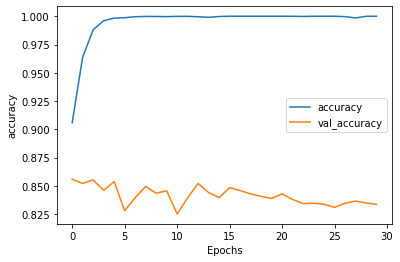

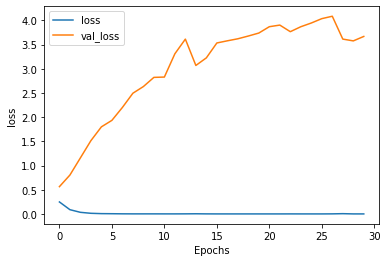

In [51]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [52]:
#Linear regression
model2 = LogisticRegression()
model2.fit(train_padding, df_traindata['isHateSpeech'])

C:\Apps\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
classification_pred = model2.predict(test_padding)
#print(classification_pred[0])
#classification_pred.shape
list1=[]
list1=df_testdata['isHateSpeech'].tolist()
list2=[]
list2=classification_pred
#diff=df_testdata['isHateSpeech']-classification_pred
#Mse = mean_squared_error(df_testdata['isHateSpeech'],classification_pred )
error=[]
#print(list1)
print(list1[0])
#print(list2[0][0])

1


In [ ]:
for i in range(0,len(list1)-1):
    error.append(abs(list1[i]-list2[i][0]))

In [ ]:
print(error)

In [ ]:
plt.plot(error)

In [55]:
rf=RandomForestClassifier()
rf.fit(train_padding, df_traindata['isHateSpeech'])
y_preds = rf.predict(test_padding)
print(y_preds)

[1 1 1 ... 1 1 0]


In [56]:
from sklearn.metrics import accuracy_score

In [57]:
acc=accuracy_score(df_testdata['isHateSpeech'],y_preds)

In [58]:
print("Random Forest, Accuracy Score:",acc)

Random Forest, Accuracy Score: 0.8851540616246498
